# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.8 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.05899999868124724


When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

### 5. Instantiate the Environment and Agent

In [7]:
from ddpg_agent import Agent

env_info = env.reset(train_mode=True)[brain_name]
agent = Agent(state_size=state_size, action_size=action_size, random_seed=2, num_agents=num_agents)

### 6. Train the Agent with DDPG

In [8]:
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from workspace_utils import active_session   # keep session active

In [9]:
import time

In [10]:
scores = []

def ddpg(n_episodes=1000, max_t=1000, print_every=100, reset_time = 100):
    scores_deque = deque(maxlen=print_every)
    #scores = []
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        scores_i_episode = np.zeros(num_agents)
        for t in range(max_t):
            if t % reset_time == 0:
                agent.reset()
                
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done 
            scores_i_episode += env_info.rewards
            
            agent.step(states, actions, rewards, next_states, dones)
            
            states = next_states
            
            if np.any(dones):
                break
            
        
        scores_deque.append(scores_i_episode)
        scores.append(scores_i_episode)
        
        print('\rEpisode {}\tAverage Score: {:.2f}\tLast Episode score: {:.2f}'.format(i_episode, np.mean(scores_deque), 
                                                                                       np.mean(scores_i_episode)), 
              end="")
        
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
    
        if np.mean(scores_deque) >= 32.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:2f}'.format(i_episode-print_every,
                                                                                       np.mean(scores_deque)))
            break
            
    return scores
        
    

In [11]:
start = time.time()
with active_session():
    scores = ddpg()
end = time.time()

Episode 100	Average Score: 27.65	Last Episode score: 38.72
Episode 112	Average Score: 32.02	Last Episode score: 35.95
Environment solved in 12 episodes!	Average Score: 32.021109


In [12]:
print('Time taken: {} seconds'.format(end-start))

Time taken: 1903.9732556343079 seconds


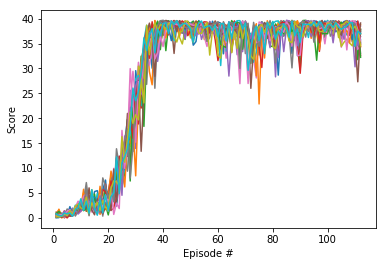

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 7. Watch a smart Agent

We can run the trained agent now on the environment to see how it performs in testing mode

In [14]:
# Load trained agent
from ddpg_agent import Agent
trained_agent = Agent(state_size=state_size, action_size=action_size, random_seed=2, num_agents=num_agents)

actor_state_dict = torch.load('./checkpoint_actor.pth', map_location=lambda storage, loc:storage)
critic_state_dict = torch.load('./checkpoint_critic.pth', map_location=lambda storage, loc:storage)

trained_agent.actor_local.load_state_dict(actor_state_dict)
trained_agent.critic_local.load_state_dict(critic_state_dict)

In [27]:
test_scores = []
for i_episode in range(1, 101):
    env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    score_i = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = trained_agent.act(states)                        # select an action (for each agent)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        score_i += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    
    if i_episode % 10 == 0:
        print('Episode: {}\tScore: {:.2f}'.format(i_episode, np.mean(score_i)))
    test_scores.append(score_i)
print('Total scores (averaged over agents) over 100 episodes: {:.2f}'.format(np.mean(test_scores)))

Episode: 10	Score: 35.76
Episode: 20	Score: 35.45
Episode: 30	Score: 35.84
Episode: 40	Score: 37.00
Episode: 50	Score: 35.36
Episode: 60	Score: 36.33
Episode: 70	Score: 36.14
Episode: 80	Score: 36.57
Episode: 90	Score: 37.80
Episode: 100	Score: 35.94
Total scores (averaged over agents) over 100 episodes: 36.57


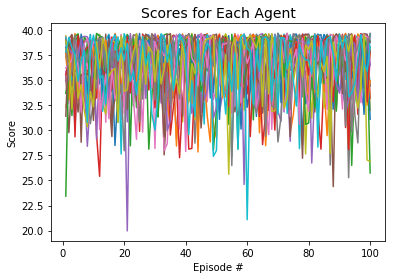

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(test_scores)+1), test_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Scores for Each Agent', size=14)
plt.show()

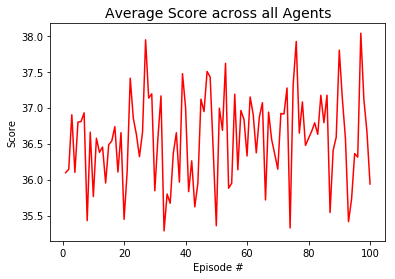

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(test_scores)+1), np.mean(test_scores, axis=1), 'r')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Average Score across all Agents', size=14)
plt.show()

### 8. Illustration of the Ornstein-Uhlenbeck Process for noise generation

Below we can see statistical testing of samples generated from 3 different implementations of the Ornstein-Uhlenbeck Process.

1. "Udacity Github implementation" - This is the implementation from Udacity's Deep Reinforcement Learning Github page


2. "First Update" - This is an update to the above implementation by subtracting 0.5 from random values to centre the resulting random values at 0.0. The hyperparameters theta and sigma are also updated


3. "Final Implementation" - This is the implementation used in the final agent's training. The random value generator is changed from random.random() (values range from 0 to 1) to a standard normal distribution (mean 0, standard deviation of 1). The actual implemenation generates a 2 dimensional array where 1st dimension represents individual agent and 2nd dimension is for the actions of the corresponding agent. For illustration, we assume there is only 1 agent and use only 1 dimension to see the noise added to the actions array.


The tests generate 100 samples for each implementation. Each sample has 4 values, 1 for each action. So, in total, we have 400 values across 100 samples. Since the noise process is same for all actions, we can describe statistics using all 400 values. A histogram is also plotted to visualize the distribution of the noise.

In [13]:
import numpy as np
import random
import copy
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

_= random.seed(2)

In [40]:
def plot_noise(x, title):
    n, bins, patches = plt.hist(x, 10, facecolor='g', alpha=0.75)
    plt.xlabel('Noise')
    plt.ylabel('Frequency')
    plt.title(title)
    
    plt.grid(True)
    

plot_titles_prefix = {
    1: 'Udacity Github implementation',
    2: 'First Update',
    3: 'Final Implementation'
}
    
def run_noise(impl, theta, sigma):
    print('Running Noise Process for {}'.format(plot_titles_prefix[impl]))
    mu = 0.0 * np.ones(4)
    x = copy.copy(mu)

    for i in range(100):
        if impl == 1:
            dx = theta * (mu - x) + sigma * np.array([random.random() for i in range(len(x))])
        elif impl == 2:
            dx = theta * (mu - x) + sigma * np.array([random.random()-0.5 for i in range(len(x))])
        elif impl == 3:
            dx = theta * (mu - x) + sigma * np.random.standard_normal(size=x.shape)
        else:
            print('Incorrect Implementation')
            return
            
        x = x + dx
        all_x = np.concatenate([all_x, x], axis=None) if i > 0 else x
        if (i<10):
            print('\nNoise Sample {}:'.format(i+1))
            print(x)

    print ('\nStatistics for {} samples:'.format(i+1))
    #print(all_x)
    print(stats.describe(all_x))

    plot_noise(all_x, plot_titles_prefix[impl] + ' Noise Histogram')


Running Noise Process for Udacity Github implementation

Noise Sample 1:
[ 0.05461561  0.1245731   0.17459964  0.07531994]

Noise Sample 2:
[ 0.16382014  0.1508034   0.31974686  0.15256515]

Noise Sample 3:
[ 0.23649921  0.25937274  0.33560955  0.29225019]

Noise Sample 4:
[ 0.29287242  0.30637574  0.43040625  0.38176748]

Noise Sample 5:
[ 0.39087601  0.43540767  0.52766559  0.40601681]

Noise Sample 6:
[ 0.46100836  0.54284431  0.4596568   0.47695809]

Noise Sample 7:
[ 0.49734847  0.54204567  0.41451739  0.46304516]

Noise Sample 8:
[ 0.57274339  0.63760085  0.54966731  0.54448616]

Noise Sample 9:
[ 0.66286555  0.70718651  0.50018587  0.60089101]

Noise Sample 10:
[ 0.73726456  0.75151484  0.48045419  0.65076562]

Statistics for 100 samples:
DescribeResult(nobs=400, minmax=(0.054615613216103913, 0.93646048203828947), mean=0.63597714893393442, variance=0.017815958025699859, skewness=-1.1013322722097139, kurtosis=2.702493282749857)


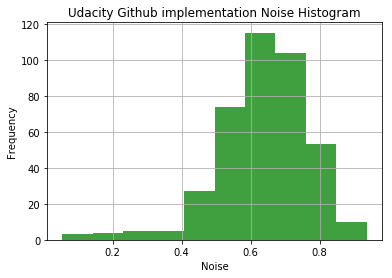

In [41]:
run_noise(1, 0.15, 0.2)

plt.show()

Running Noise Process for First Update

Noise Sample 1:
[ 0.01488924 -0.17595768  0.20297076 -0.14364106]

Noise Sample 2:
[-0.13706173 -0.31518491  0.06119283 -0.12128495]

Noise Sample 3:
[ 0.09062552 -0.32154791 -0.0307764   0.07420083]

Noise Sample 4:
[-0.19279589 -0.20430599 -0.19107182  0.17233056]

Noise Sample 5:
[-0.19681456 -0.28159889 -0.28948872 -0.05934085]

Noise Sample 6:
[ 0.00309762 -0.33285967 -0.37484775 -0.16000224]

Noise Sample 7:
[-0.22744427 -0.05096186 -0.05824652 -0.06371948]

Noise Sample 8:
[-0.19678216 -0.25596375  0.07844439 -0.16063331]

Noise Sample 9:
[-0.07381794  0.11597454 -0.09075775  0.01364112]

Noise Sample 10:
[-0.06799027  0.07485412 -0.0930527   0.10778544]

Statistics for 100 samples:
DescribeResult(nobs=400, minmax=(-0.42644428418231556, 0.39261133587415242), mean=0.0084792199426680787, variance=0.025565816385556987, skewness=-0.15022397424833445, kurtosis=-0.5014657997271206)


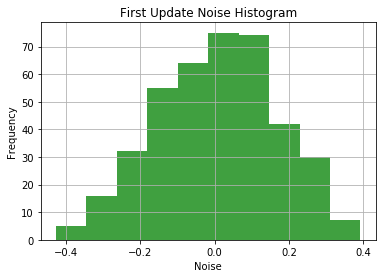

In [42]:
run_noise(2, 0.5, 0.5)

plt.show()

Running Noise Process for Final Implementation

Noise Sample 1:
[-0.03474257 -0.05962166 -0.08398886  0.40847095]

Noise Sample 2:
[-0.03004918  0.04425418 -0.35126071  0.13241122]

Noise Sample 3:
[-0.25033836  0.58320301  0.09294739  0.13345791]

Noise Sample 4:
[ 0.12053141  0.42676586  0.18764053  0.14859177]

Noise Sample 5:
[ 0.57237411  0.49803656  0.02683364  0.85021827]

Noise Sample 6:
[ 0.36129179  0.38306702  0.16413184  0.67388806]

Noise Sample 7:
[-0.22838365 -0.1204436  -0.28467951  0.44181658]

Noise Sample 8:
[-0.85359885 -0.10722134 -0.17258294  0.37497104]

Noise Sample 9:
[-0.66677481 -0.16403439 -0.02244993  0.40102194]

Noise Sample 10:
[-0.80813143 -0.03220699 -0.11100197  0.52750853]

Statistics for 100 samples:
DescribeResult(nobs=400, minmax=(-1.1595399840493719, 0.98139262164680319), mean=0.057029421989412736, variance=0.15218573537108607, skewness=-0.20053119014354173, kurtosis=-0.139904138866636)


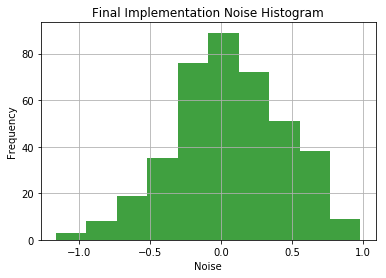

In [43]:
run_noise(3, 0.2, 0.25)

plt.show()


The above results show that "Udacity Github Implementation" results in a noise process that is biased towards positive values, with a minimum of 0.054, a maximum of 0.936 and a mean of 0.63. Since the values for the actions can range from -1 to +1, this adds a directional bias to the actions. As a result, the agent is not getting trained for actions with negative values (of reasonable size). This hinders the training of the agent and we can see really long training time for the agent, the need for fine tuning the noise parameters and still not hitting the +30 score.

The "First Update" implementation results in more balanced results, with a minimum of -0.42, maximum of 0.39 and a mean of 0.008. The improvement in training was minor and not enough to get the +30 score.

The "Final Implementation" gives a good balance of negative and positive values, with a minimum of -1.16, maximum of 0.98 and a mean of 0.057. This implementation has a much higher variance of 0.15 as compared to the variance of 0.025 in case of "First Update". This was a game changer and resulted in a very fast training process without changing any other hyperparameter. 